In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [2]:
dead_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaHandelseK'
dead_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

pop_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/FolkmangdNov'
pop_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [3]:
def get_data(url,query):
    r = requests.post(url,json=query)
    
    if r.status_code != 200 :
        print (r.status_code)
    
    data = pd.DataFrame.from_dict(r.json()['data'])
    data[['area','age','gender','year']] = data['key'].to_list()
    data['count'] = data['values'].apply(lambda x : x[0])
    data['age'] = data['age'].apply(lambda x : x.replace('+','')).astype(int)
    data.drop(['values','key','area'],axis=1,inplace=True)
    data.set_index('year',inplace=True)
    data['count'] = data['count'].astype(int)
    data = data.groupby(['year','age']).sum()
    
    return data
    


In [4]:
dead_df = get_data(dead_url,dead_query)
dead_df

count
year age       
1968 0     1478
     1       87
     2       63
     3       62
     4       50
...         ...
2020 96    1789
     97    1270
     98    1065
     99     759
     100   1247

[5353 rows x 1 columns]

In [5]:
pop_df = get_data(pop_url,pop_query)
pop_df

count
year age       
2002 0    82336
     1    92580
     2    92138
     3    90251
     4    91214
...         ...
2020 96    5709
     97    3972
     98    2707
     99    1915
     100   2715

[1919 rows x 1 columns]

In [6]:
def bin_category(df,binsize=10):
    
    binned = pd.cut(df.index.get_level_values(1),range(-1,100+binsize,binsize),labels=range(0,100+binsize,binsize))
    return binned

In [7]:
def binit(df,binsize=10):
    return df.groupby(['year',bin_category(df,binsize=binsize)]).sum()
    


In [8]:
dead_bin_5 = binit(dead_df,binsize=5)
pop_bin_5 = binit(pop_df,binsize=5)

dead_bin_1 = binit(dead_df,binsize=1)
pop_bin_1 = binit(pop_df,binsize=1)

In [9]:
def agg_bin_data(pop,dead):
    
    bin_data = pd.concat([pop,dead],axis=1).dropna()
    bin_data.columns = ['pop','dead']
    bin_data['mortality'] = bin_data['dead'] / bin_data['pop']
    bin_data.index.names=('year','age_grp')
    return bin_data

In [10]:
bin_1_data = agg_bin_data(pop_bin_1,dead_bin_1)
bin_5_data = agg_bin_data(pop_bin_5,dead_bin_5)

print (bin_1_data.head())

# sanity check # 
((bin_5_data.groupby('year').sum() == bin_1_data.groupby('year').sum()).all()) & \
(bin_1_data.groupby('year').sum().loc['2020','dead'] == 98124)

                  pop  dead  mortality
year age_grp                          
2002 0        82336.0   313   0.003801
     1        92580.0    24   0.000259
     2        92138.0    25   0.000271
     3        90251.0    10   0.000111
     4        91214.0    10   0.000110


pop           True
dead          True
mortality    False
dtype: bool

In [11]:
bin_1_data

pop  dead  mortality
year age_grp                          
2002 0        82336.0   313   0.003801
     1        92580.0    24   0.000259
     2        92138.0    25   0.000271
     3        90251.0    10   0.000111
     4        91214.0    10   0.000110
...               ...   ...        ...
2020 96        5709.0  1789   0.313365
     97        3972.0  1270   0.319738
     98        2707.0  1065   0.393424
     99        1915.0   759   0.396345
     100       2715.0  1247   0.459300

[1919 rows x 3 columns]

In [12]:
yearly_stats = bin_1_data.groupby('year')[['pop','dead']].sum()
yearly_stats

,pop,dead
year,,
2002,8939367.0,95009
2003,8973472.0,92961
2004,9008883.0,90532
2005,9042663.0,91710
2006,9107935.0,91177
2007,9174464.0,91729
2008,9248976.0,91449
2009,9331619.0,90080
2010,9408320.0,90487


In [13]:
yearly_stats_base_15_18 = yearly_stats.loc['2015' : '2018'].mean()
yearly_stats_base_15_18

pop     10031350.0
dead       91511.5
dtype: float64

In [14]:
yearly_growth = yearly_stats / yearly_stats.shift()
yearly_growth

,pop,dead
year,,
2002,NaN,NaN
2003,1.003815,0.978444
2004,1.003946,0.973871
2005,1.003750,1.013012
2006,1.007218,0.994188
2007,1.007305,1.006054
2008,1.008122,0.996948
2009,1.008935,0.985030
2010,1.008219,1.004518


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


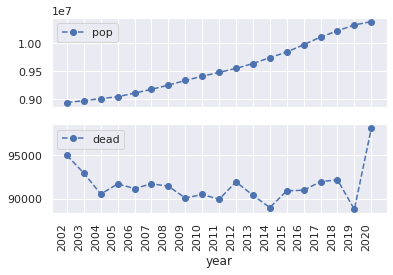

In [15]:
axes = yearly_stats.plot(subplots=True,style='o--',sharex=True)

axes[1].set_xticks(range(len(yearly_stats)))
_= axes[1].set_xticklabels(range(2002,2021),rotation=90)

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

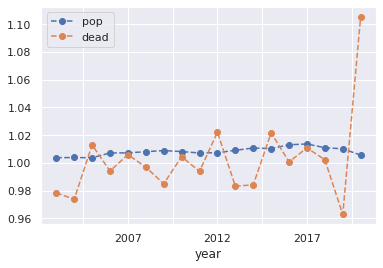

In [16]:
yearly_growth.plot(style='o--')

In [17]:
bin_1_base_15_18 = bin_1_data.loc['2015' : '2018'].groupby(['age_grp']).mean()
bin_1_base_15_19 = bin_1_data.loc['2015' : '2019'].groupby(['age_grp']).mean()

bin_1_base_15_18

,pop,dead,mortality
age_grp,,,
0,100028.50,271.75,0.002717
1,118966.75,22.25,0.000187
2,119993.75,15.75,0.000131
3,119949.50,9.50,0.000079
4,120195.75,12.00,0.000100
...,...,...,...
96,5382.25,1620.00,0.300639
97,3726.00,1214.50,0.326506
98,2399.00,843.25,0.352301


In [18]:
bin_1_base_15_18_expected = bin_1_base_15_18['mortality'] * bin_1_data['pop']
bin_1_base_15_18_expected_tot = bin_1_base_15_18_expected.groupby('year').sum()

bin_1_base_15_19_expected = bin_1_base_15_19['mortality'] * bin_1_data['pop']
bin_1_base_15_19_expected_tot = bin_1_base_15_19_expected.groupby('year').sum()

bin_1_base_15_18_expected_tot

year
2002    75379.151432
2003    76250.098820
2004    77400.050413
2005    78413.019399
2006    79551.630758
2007    80490.219711
2008    81488.049896
2009    82582.684679
2010    83829.415068
2011    84948.437640
2012    85859.997359
2013    86929.531298
2014    88359.249532
2015    89540.253570
2016    90987.416605
2017    92182.273875
2018    93502.375723
2019    95513.758999
2020    96947.611871
dtype: float64

In [19]:
bin_1_actuals = bin_1_data.groupby(['year'])['dead'].sum()
bin_1_actuals

year
2002    95009
2003    92961
2004    90532
2005    91710
2006    91177
2007    91729
2008    91449
2009    90080
2010    90487
2011    89938
2012    91938
2013    90402
2014    88976
2015    90907
2016    90982
2017    91972
2018    92185
2019    88766
2020    98124
Name: dead, dtype: int64

In [20]:
bin_1_excess = pd.DataFrame()
bin_1_excess['age_mort_base_15_18'] = bin_1_data.groupby('year')['dead'].sum() - bin_1_base_15_18_expected_tot
bin_1_excess['age_mort_base_15_18_pct'] = bin_1_data.groupby('year')['dead'].sum() / bin_1_base_15_18_expected_tot

bin_1_excess['age_mort_base_15_19'] = bin_1_data.groupby('year')['dead'].sum() - bin_1_base_15_19_expected_tot
bin_1_excess['age_mort_base_15_19_pct'] = bin_1_data.groupby('year')['dead'].sum() / bin_1_base_15_19_expected_tot

bin_1_excess

,age_mort_base_15_18,age_mort_base_15_18_pct,age_mort_base_15_19,age_mort_base_15_19_pct
year,,,,
2002,19629.848568,1.260415,20713.960429,1.278807
2003,16710.901180,1.219159,17806.909031,1.236939
2004,13131.949587,1.169663,14243.764789,1.186710
2005,13296.980601,1.169576,14424.331300,1.186637
2006,11625.369242,1.146136,12763.240286,1.162768
2007,11238.780289,1.139629,12388.704908,1.156146
2008,9960.950104,1.122238,11124.537998,1.138495
2009,7497.315321,1.090786,8680.300601,1.106638
2010,6657.584932,1.079418,7852.950629,1.095033


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 0.98, 'SWE excess deaths by age specific mortality [1 year bins] two baselines\nDataSource : scb.se')

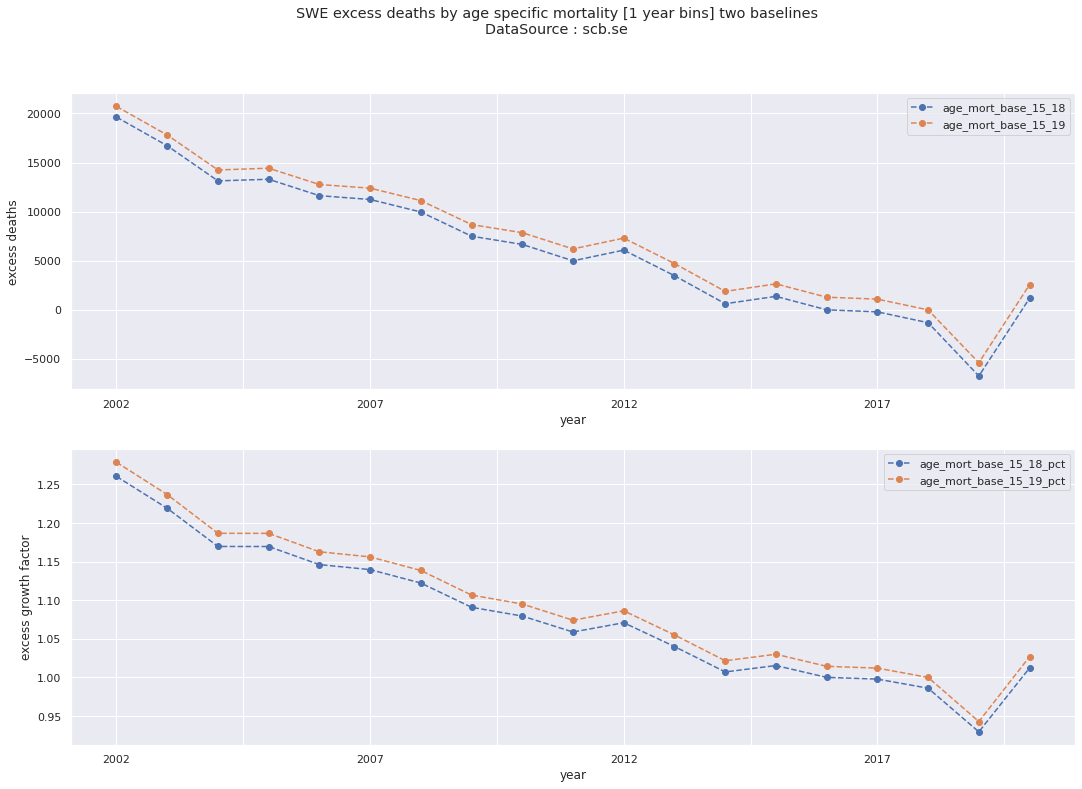

In [21]:
fig,axes = plt.subplots(2)

bin_1_excess.plot(ax = axes[0],y=['age_mort_base_15_18','age_mort_base_15_19'],figsize=(18,12),style='o--')
axes[0].set_ylabel('excess deaths')

bin_1_excess.plot(ax=axes[1],y=['age_mort_base_15_18_pct','age_mort_base_15_19_pct'],style='o--')
axes[1].set_ylabel('excess growth factor')

plt.suptitle('SWE excess deaths by age specific mortality [1 year bins] two baselines\nDataSource : scb.se')

In [22]:
abs_excess = pd.DataFrame()

abs_excess['abs_base_15_18'] = bin_1_data.groupby('year')['dead'].sum() - bin_1_base_15_18['dead'].sum()
abs_excess['abs_base_15_18_pct'] = bin_1_data.groupby('year')['dead'].sum() / bin_1_base_15_18['dead'].sum()

abs_excess['abs_base_15_19'] = bin_1_data.groupby('year')['dead'].sum() - bin_1_base_15_19['dead'].sum()
abs_excess['abs_base_15_19_pct'] = bin_1_data.groupby('year')['dead'].sum() / bin_1_base_15_19['dead'].sum()

abs_excess

,abs_base_15_18,abs_base_15_18_pct,abs_base_15_19,abs_base_15_19_pct
year,,,,
2002,3497.5,1.038219,4046.6,1.044487
2003,1449.5,1.015840,1998.6,1.021972
2004,-979.5,0.989296,-430.4,0.995268
2005,198.5,1.002169,747.6,1.008219
2006,-334.5,0.996345,214.6,1.002359
2007,217.5,1.002377,766.6,1.008428
2008,-62.5,0.999317,486.6,1.005349
2009,-1431.5,0.984357,-882.4,0.990299
2010,-1024.5,0.988805,-475.4,0.994774


In [23]:
import scipy.stats as sps

trend_start = 2015
trend_end = 2018

def find_slope_intercept(s):
    s.index = s.index.astype(int)
    slope,intercept,_,_,_ = sps.linregress(np.arange(trend_start,trend_end + 1),s.loc[trend_start:trend_end])
    return slope,intercept
    
    
bin_1_data_flat = bin_1_data['mortality'].unstack()
bin_1_trend = bin_1_data_flat.apply(find_slope_intercept).T
bin_1_trend.columns = ['slope','intercept']
bin_1_trend

,slope,intercept
age_grp,,
0,-0.000160,0.324571
1,0.000014,-0.027084
2,-0.000005,0.010258
3,0.000009,-0.018222
4,-0.000005,0.010156
...,...,...
96,0.013412,-26.743913
97,-0.000332,0.996433
98,-0.002702,5.800448


In [24]:
X = np.arange(2002,2021)
bin_1_trend_mortality = pd.DataFrame([X[i] * bin_1_trend['slope'] + \
                                        bin_1_trend['intercept'] for i in range(len(X))]) 

bin_1_trend_mortality.index = np.arange(2002,2021).astype(str)

bin_1_trend_mortality

age_grp,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
2002,0.005031,-0.000009,0.000204,-0.000053,0.000172,-0.000077,0.000459,0.000137,-1.758299e-05,0.000280,...,0.220838,0.215819,0.308007,0.277645,0.265607,0.106170,0.331323,0.391477,0.296473,0.451022
2003,0.004871,0.000005,0.000199,-0.000043,0.000167,-0.000066,0.000434,0.000131,-1.196139e-05,0.000263,...,0.218019,0.214664,0.302296,0.275795,0.266303,0.119582,0.330991,0.388775,0.302623,0.451910
2004,0.004712,0.000018,0.000194,-0.000034,0.000162,-0.000056,0.000408,0.000126,-6.339782e-06,0.000246,...,0.215201,0.213508,0.296585,0.273945,0.266999,0.132994,0.330659,0.386073,0.308773,0.452799
2005,0.004552,0.000032,0.000189,-0.000025,0.000157,-0.000046,0.000383,0.000121,-7.181779e-07,0.000229,...,0.212382,0.212352,0.290874,0.272095,0.267695,0.146405,0.330326,0.383371,0.314923,0.453687
2006,0.004392,0.000045,0.000184,-0.000016,0.000152,-0.000036,0.000357,0.000116,4.903426e-06,0.000212,...,0.209563,0.211196,0.285162,0.270246,0.268392,0.159817,0.329994,0.380669,0.321073,0.454576
2007,0.004233,0.000059,0.000179,-0.000007,0.000147,-0.000025,0.000332,0.000110,1.052503e-05,0.000196,...,0.206744,0.210041,0.279451,0.268396,0.269088,0.173229,0.329662,0.377968,0.327224,0.455464
2008,0.004073,0.000072,0.000174,0.000002,0.000142,-0.000015,0.000307,0.000105,1.614663e-05,0.000179,...,0.203925,0.208885,0.273740,0.266546,0.269784,0.186640,0.329330,0.375266,0.333374,0.456352
2009,0.003914,0.000086,0.000169,0.000011,0.000137,-0.000005,0.000281,0.000100,2.176824e-05,0.000162,...,0.201107,0.207729,0.268029,0.264696,0.270480,0.200052,0.328997,0.372564,0.339524,0.457241
2010,0.003754,0.000099,0.000164,0.000020,0.000132,0.000006,0.000256,0.000094,2.738984e-05,0.000145,...,0.198288,0.206573,0.262318,0.262846,0.271176,0.213463,0.328665,0.369862,0.345674,0.458129
2011,0.003594,0.000113,0.000159,0.000029,0.000127,0.000016,0.000230,0.000089,3.301145e-05,0.000128,...,0.195469,0.205417,0.256606,0.260997,0.271872,0.226875,0.328333,0.367160,0.351824,0.459018


In [25]:
bin_1_pop_flat = bin_1_data['pop'].unstack()
bin_1_trend_expectation = bin_1_pop_flat * bin_1_trend_mortality
bin_1_trend_expectation_tot = bin_1_trend_expectation.sum(axis=1)
bin_1_trend_expectation_tot

year
2002    86447.162852
2003    86712.493287
2004    87044.999840
2005    87387.098316
2006    87728.661378
2007    87771.864459
2008    88015.922383
2009    88351.214942
2010    88816.901423
2011    89237.139770
2012    89403.340203
2013    89732.358525
2014    90387.368057
2015    90752.915355
2016    91391.487336
2017    91765.355952
2018    92201.127578
2019    93276.497638
2020    93767.424520
dtype: float64

In [26]:
bin_1_trend_excess = pd.DataFrame(bin_1_data.groupby('year')['dead'].sum() - bin_1_trend_expectation_tot,
                                  columns = ['bin_1_15_18_trend'])

bin_1_trend_excess['bin_1_15_18_trend_pct'] = bin_1_data.groupby('year')['dead'].sum() /\
bin_1_trend_expectation_tot
bin_1_trend_excess

,bin_1_15_18_trend,bin_1_15_18_trend_pct
year,,
2002,8561.837148,1.099041
2003,6248.506713,1.072060
2004,3487.000160,1.040060
2005,4322.901684,1.049468
2006,3448.338622,1.039307
2007,3957.135541,1.045084
2008,3433.077617,1.039005
2009,1728.785058,1.019567
2010,1670.098577,1.018804


In [27]:
all_excess = pd.concat([bin_1_excess,abs_excess,bin_1_trend_excess],axis=1)
all_excess

,age_mort_base_15_18,age_mort_base_15_18_pct,age_mort_base_15_19,age_mort_base_15_19_pct,abs_base_15_18,abs_base_15_18_pct,abs_base_15_19,abs_base_15_19_pct,bin_1_15_18_trend,bin_1_15_18_trend_pct
year,,,,,,,,,,
2002,19629.848568,1.260415,20713.960429,1.278807,3497.5,1.038219,4046.6,1.044487,8561.837148,1.099041
2003,16710.901180,1.219159,17806.909031,1.236939,1449.5,1.015840,1998.6,1.021972,6248.506713,1.072060
2004,13131.949587,1.169663,14243.764789,1.186710,-979.5,0.989296,-430.4,0.995268,3487.000160,1.040060
2005,13296.980601,1.169576,14424.331300,1.186637,198.5,1.002169,747.6,1.008219,4322.901684,1.049468
2006,11625.369242,1.146136,12763.240286,1.162768,-334.5,0.996345,214.6,1.002359,3448.338622,1.039307
2007,11238.780289,1.139629,12388.704908,1.156146,217.5,1.002377,766.6,1.008428,3957.135541,1.045084
2008,9960.950104,1.122238,11124.537998,1.138495,-62.5,0.999317,486.6,1.005349,3433.077617,1.039005
2009,7497.315321,1.090786,8680.300601,1.106638,-1431.5,0.984357,-882.4,0.990299,1728.785058,1.019567
2010,6657.584932,1.079418,7852.950629,1.095033,-1024.5,0.988805,-475.4,0.994774,1670.098577,1.018804


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


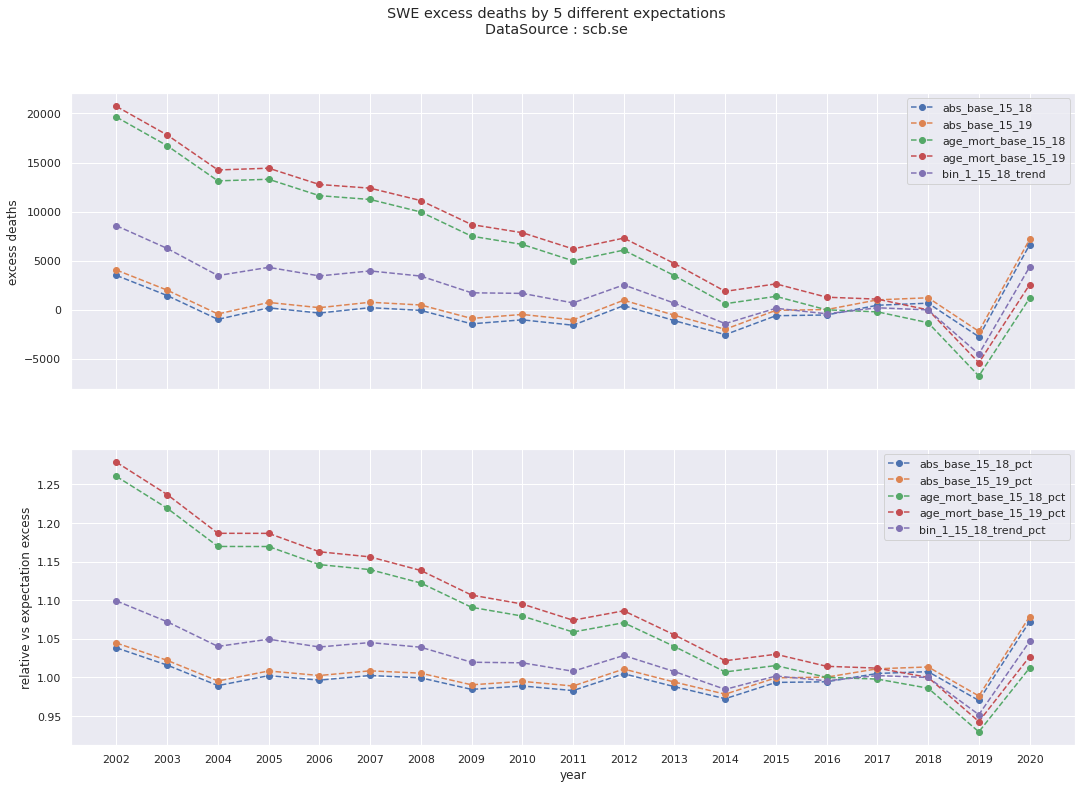

In [28]:
fig,axes = plt.subplots(2,sharex=True)

all_excess.plot(ax = axes[0],
                y=['abs_base_15_18','abs_base_15_19',
                   'age_mort_base_15_18','age_mort_base_15_19',
                  'bin_1_15_18_trend'],
                figsize=(18,12),style='o--')

axes[0].set_ylabel('excess deaths')


all_excess.plot(ax=axes[1],
                y=['abs_base_15_18_pct','abs_base_15_19_pct',
                   'age_mort_base_15_18_pct','age_mort_base_15_19_pct',
                  'bin_1_15_18_trend_pct'],
                style='o--')

axes[1].set_ylabel('relative vs expectation excess')

axes[1].set_xticks(range(len(all_excess)))
axes[1].set_xticklabels(range(2002,2021))

plt.suptitle('SWE excess deaths by 5 different expectations\nDataSource : scb.se')
plt.savefig('SCB_ALL_EXCESS.jpg',format='jpg')